In [1]:
!pip install diffusers==0.10.2 transformers scipy ftfy accelerate

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 503.1/503.1 KB 35.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 105.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.1/53.1 KB 7.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.7/199.7 KB 27.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.3/190.3 KB 22.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 77.7 MB/s eta 0:00:00


In [2]:
import torch 
from diffusers import StableDiffusionPipeline

In [ ]:
pipe = StableDiffusionPipeline.from_pretrained('runwayml/stable-diffusion-v1-5', revision='fp16', torch_dtype=torch.float16)
pipe.to('cuda')

Fetching 15 files:   0%|          | 0/15 [00:00<?, ?it/s]

In [5]:
images = pipe('planets with 3 moons').images
images

  0%|          | 0/50 [00:00<?, ?it/s]

[<PIL.Image.Image image mode=RGB size=512x512 at 0x7FA8B2AA7F70>]

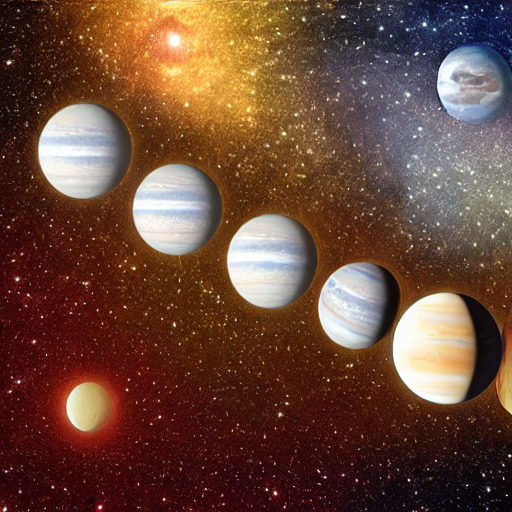

In [7]:
images[0]

  0%|          | 0/50 [00:00<?, ?it/s]

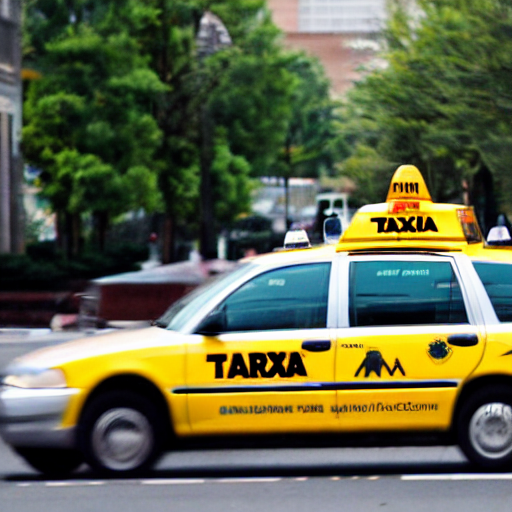

In [8]:
pipe('a taxi hailing website').images[0]

  0%|          | 0/50 [00:00<?, ?it/s]

CPU times: user 9.44 s, sys: 98.4 ms, total: 9.53 s
Wall time: 11.5 s


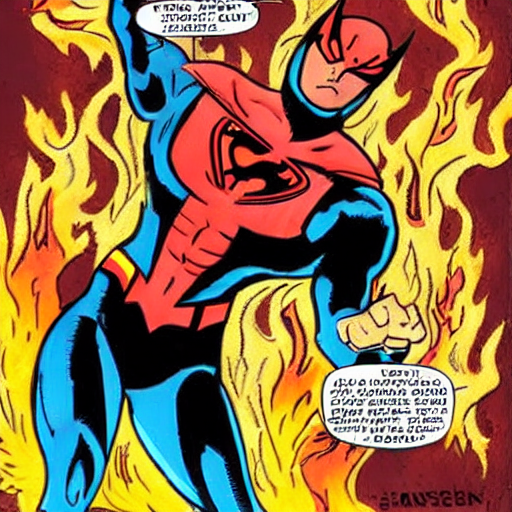

In [10]:
%%time
pipe('a superhero with flames superpower').images[0]

# Huggingface

Fetching 16 files:   0%|          | 0/16 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

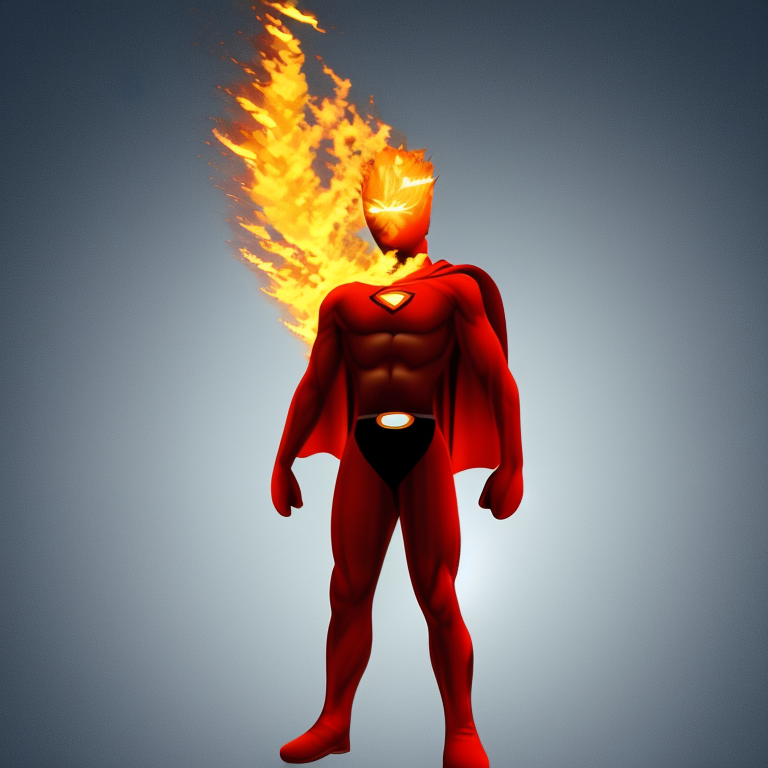

In [11]:
from diffusers import StableDiffusionPipeline, EulerDiscreteScheduler

model_id = 'stabilityai/stable-diffusion-2'
scheduler = EulerDiscreteScheduler.from_pretrained(model_id, subfolder='scheduler')
pipe = StableDiffusionPipeline.from_pretrained(model_id, scheduler=scheduler, torch_dtype=torch.float16)
pipe = pipe.to('cuda')

prompt = 'a superhero with flames superpower'
image = pipe(prompt).images[0]
# image.save('img.png')
image

  0%|          | 0/50 [00:00<?, ?it/s]

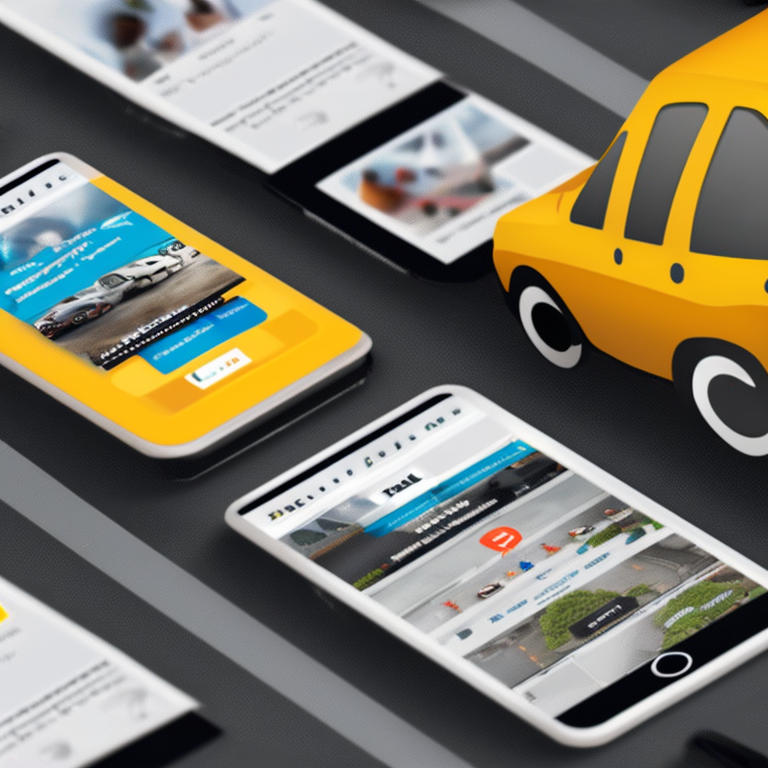

In [12]:
%%time
prompt = 'a taxi hailing website'
image = pipe(prompt).images[0]
image